# Neuromodulation example

This neuromodulation creates a small network of neurons. We also use the reaction diffusion model by Anu G Nair 2015.

To generate the ```reaction_diffusion.json``` file in ```data/dspn_rxd``` from the xml file we run ```data/convert_sbml_to_json.sh```

To get the RxD functionality of the ```DA_syn``` we must specify the "RxD" block under channel_parameters in the connectivity block of the network configuration. See ```data/connectivity.json```

```
    "channel_parameters":
		"RxD": {
		    "species_name": "DA",
		    "flux_variable": "open",
		    "region": "internal"
		},

     ...
     }
```

In [1]:
import os
from snudda import Snudda

neuron_path = os.path.join("data", "dspn_rxd")
network_path = os.path.join("networks", "neuromodulation_example_anu")
connectivity_path = os.path.join("data", "connectivity.json")

snudda = Snudda(network_path=network_path)
snudda.init_tiny(neuron_paths=neuron_path, neuron_names="neuron_1", number_of_neurons=[2], 
                 connection_config=connectivity_path, random_seed=12345)
snudda.create_network()

Reading connectivity from data/connectivity.json
Adding neurons: neuron_1 from dir data/dspn_rxd
Writing networks/neuromodulation_example_anu/network-config.json
Placing neurons
Network path: networks/neuromodulation_example_anu
Reading SNUDDA_DATA=None from networks/neuromodulation_example_anu/network-config.json
Reading SNUDDA_DATA=/home/hjorth/HBP/Snudda/snudda/utils/../data from networks/neuromodulation_example_anu/network-synapses.hdf5
No n_putative_points and putative_density, setting n_putative_points = 63
(this must be larger than the number of neurons you want to place)
Generating 63 points for networks/neuromodulation_example_anu/mesh/Cube-cube-mesh-2.917951293943981e-05.obj
Filtering, keeping inside points: 4 / 26
neuron_name = 'neuron_1', num = 2, neuron_path = 'data/dspn_rxd'
stop_parallel disabled, to keep pool running.

Execution time: 0.0s
Touch detection
Network path: networks/neuromodulation_example_anu
Reading SNUDDA_DATA=None from networks/neuromodulation_example_an

In [2]:
input_config = os.path.join("data", "input.json")
snudda.setup_input(input_config=input_config)

Setting up inputs, assuming input.json exists
Reading SNUDDA_DATA=None from networks/neuromodulation_example_anu/network-config.json
Reading SNUDDA_DATA=/home/hjorth/HBP/Snudda/snudda/utils/../data from networks/neuromodulation_example_anu/network-synapses.hdf5
Writing input spikes to networks/neuromodulation_example_anu/input-spikes.hdf5
Reading SNUDDA_DATA=None from networks/neuromodulation_example_anu/network-config.json
Reading SNUDDA_DATA=/home/hjorth/HBP/Snudda/snudda/utils/../data from networks/neuromodulation_example_anu/network-synapses.hdf5
Writing spikes to networks/neuromodulation_example_anu/input-spikes.hdf5
stop_parallel disabled, to keep pool running.

Execution time: 0.6s


In [3]:
mech_dir = os.path.join("data", "mechanisms")
sim = snudda.simulate(time=0, mech_dir=mech_dir, verbose=True)

Using input file networks/neuromodulation_example_anu/input-spikes.hdf5
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64, aarch64, arm64 directories (or nrnmech.dll) then you will force a recompilation of the modules.
Reading SNUDDA_DATA=None from networks/neuromodulation_example_anu/network-config.json
Reading SNUDDA_DATA=/home/hjorth/HBP/Snudda/snudda/utils/../data from networks/neuromodulation_example_anu/network-synapses.hdf5
Using network_file: networks/neuromodulation_example_anu/network-synapses.hdf5
Using input_file: networks/neuromodulation_example_anu/input-spikes.hdf5
Using output_file: networks/neuromodulation_example_anu/simulation/output.hdf5
Using logFile: networks/neuromodulation_example_anu/log/network-simulation-log.txt-0
Worker 0 : Loading network from networks/neuromodulation_example_anu/network-synapses.hdf5
Loading config file networks/neuromodulation_example_anu/network-config.json
0 : Memory statu

In [4]:
sim.add_rxd_concentration_recording(species="PKA", neuron_id=1,
                                    region="dend_internal",
                                    sec_type="dend",
                                    sec_id=4,
                                    sec_x=0.25)

In [5]:
sim.add_rxd_concentration_recording(species="DA", neuron_id=1,
                                    region="dend_internal",
                                    sec_type="dend",
                                    sec_id=4,
                                    sec_x=0.25)

In [6]:
sim.run(t=500)

Running simulation for 0.5 s
Running Neuron simulator 500 ms, with dt=0.025
  1% done. Elapsed: 1.1 s, estimated time left: 112.4 s
  2% done. Elapsed: 2.2 s, estimated time left: 110.2 s
  3% done. Elapsed: 3.4 s, estimated time left: 109.5 s
  4% done. Elapsed: 4.5 s, estimated time left: 108.5 s
  5% done. Elapsed: 5.6 s, estimated time left: 107.2 s
  6% done. Elapsed: 6.8 s, estimated time left: 106.0 s
  7% done. Elapsed: 7.9 s, estimated time left: 104.8 s
  8% done. Elapsed: 9.0 s, estimated time left: 103.5 s
  9% done. Elapsed: 10.1 s, estimated time left: 102.2 s
 10% done. Elapsed: 11.2 s, estimated time left: 101.1 s
 20% done. Elapsed: 22.9 s, estimated time left: 91.6 s
 30% done. Elapsed: 34.6 s, estimated time left: 80.6 s
 40% done. Elapsed: 46.2 s, estimated time left: 69.4 s
 50% done. Elapsed: 57.9 s, estimated time left: 57.9 s
 60% done. Elapsed: 69.6 s, estimated time left: 46.4 s
 70% done. Elapsed: 81.0 s, estimated time left: 34.7 s
 80% done. Elapsed: 92.4 s

In [7]:
sim.record.write()

Writing network output to networks/neuromodulation_example_anu/simulation/output.hdf5
Using sample dt = None (sample step size None)
Worker 1/1 writing data to networks/neuromodulation_example_anu/simulation/output.hdf5


## Load the data and plot

In [8]:
from snudda.utils import SnuddaLoadNetworkSimulation

output_file = os.path.join(network_path, "simulation", "output.hdf5")
nd = SnuddaLoadNetworkSimulation(output_file)
time = nd.get_time()
data_pka = nd.get_data("PKA", 1)[0][1]
data_da = nd.get_data("DA", 1)[0][1]

Loading networks/neuromodulation_example_anu/simulation/output.hdf5


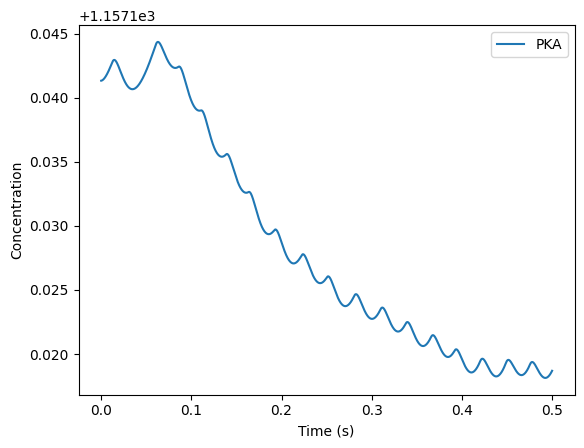

In [9]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(time, data_pka, label="PKA")
plt.xlabel("Time (s)")
plt.ylabel("Concentration")
plt.legend()
plt.show()

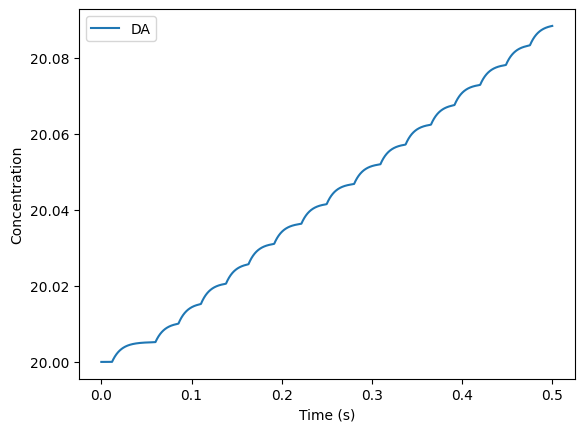

In [10]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(time, data_da, label="DA")
plt.xlabel("Time (s)")
plt.ylabel("Concentration")
plt.legend()
plt.show()

Loading networks/neuromodulation_example_anu/simulation/output.hdf5
Saving figure to networks/neuromodulation_example_anu/figures/spike-raster.png


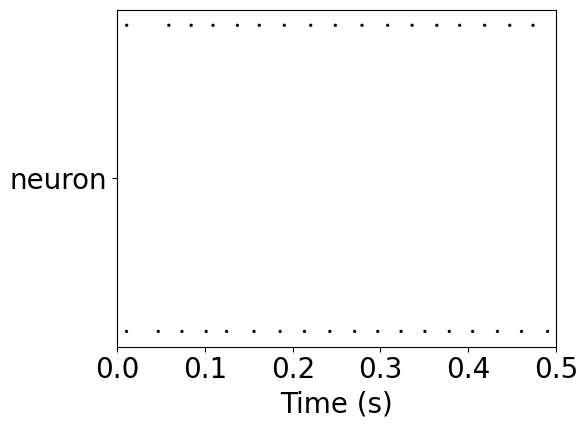

In [11]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,0.5)
spr = SnuddaPlotSpikeRaster2(network_path=network_path)

spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Loading network info from networks/neuromodulation_example_anu/network-synapses.hdf5
Loading input info from networks/neuromodulation_example_anu/input-spikes.hdf5
Loading networks/neuromodulation_example_anu/simulation/output.hdf5
Plotting traces: [0, 1]
Plotted 2 traces (total 2)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/neuromodulation/networks/neuromodulation_example_anu/figures/Network-voltage-trace--neuron-0-1.pdf


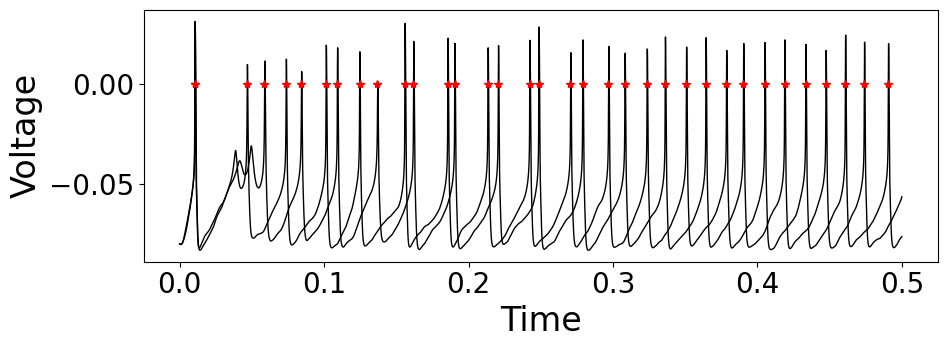

In [12]:
%matplotlib inline

sim_file = os.path.join(network_path, "simulation", "output.hdf5")

from snudda.plotting.plot_traces import PlotTraces
pt = PlotTraces(output_file=sim_file)
# Use trace_id to specify which traces
ax = pt.plot_traces(offset=0, time_range=(0,0.5),fig_size=(10,4))

## TODO!! Also add ability to have external synapses affect RxD concentrations

In [13]:
sim.neurons[0].icell.soma[0](0.5).naf_ms.gbar

20.0

In [14]:
sim.neurons[0].icell.soma[0](0.5).pas.g

1e-08